# Regressão Logística

A regressão logística é uma técnica de análise de dados com funcionalidades muito importantes voltadas, por exemplo, para a probabilidade e encontrar a relação entre duas variáveis distintas. Ela é muito utilizada em modelos de Machine Learning e Inteligência artificial, de acordo com a AWS, e possui diversos benefícios, como sua simplicidade de implementação, velocidade de processamento, flexibilidade e visibilidade.

Assim, é possível realizar uma análise preditiva a partir do resultado obtido da probabilidade de determinado cenário acontecer.

Vamos supor, por exemplo que somos uma agência de seguros e gostaríamos de saber a probabilidade de uma pessoa sofrer um acidente com base no tempo que ela passou na autoescola.

Teríamos um gráfico da seguinte forma:

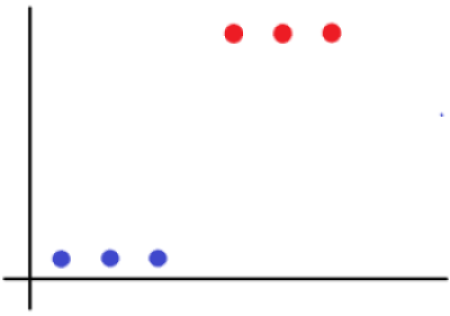

A regressão linear não conseguir definir exatamente a probabilidade por causa da falta de linearidade em relação aos dados e seu limite em relação à variável binária de sofrer acidente. Isso ocorre, porque as pessoas que já sofreram acidente são classificadas em "Sim" ou "Não". Dessa forma, poderíamos representar numericamente esse gráfico da seguinte forma, sendo o eixo y se essas pessoas já sofreram acidente, e o eixo x o número de dias que eles permaneceram na autoescola.

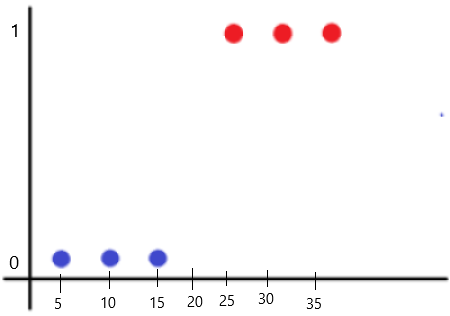

Desse modo, ao utilizar a regressão logística, estaríamos desenhando uma sigmoide para entender a probabilidade de um dos resultados dessa variável binária acontecer, com isso, podemos perceber um gráfico da seguinte maneira:

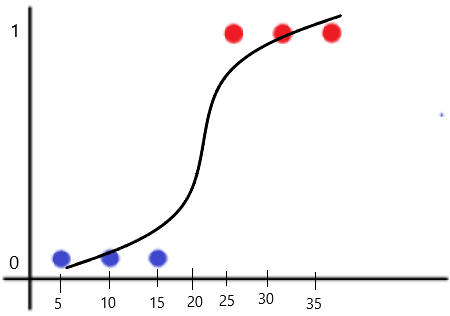

Essa sigmoide apresenta a essa equação:

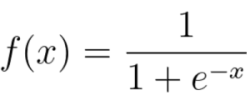

A partir disso, podemos perceber que é uma certa semelhança com uma outra técnica muito conhecida, a regressão linear, cuja fórmula é representada pela a seguir:

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importando Base

In [6]:
df = pd.read_csv("population.csv")

In [7]:
df

,Year,Yearly % \nChange,Yearly\nChange,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban\nPop %,Urban Population,Country's Share of\nWorld Pop,World Population,India\nGlobal Rank,Population
0,2050,0.23,3711367,NaN,38.1,2.24,551,53.5,876613025,16.84,9735033990,1,1639176033
1,2045,0.35,5585537,-414772.0,36.6,2.24,545,50.1,811749463,17.09,9481803274,1,1620619200
2,2040,0.50,7793541,-415736.0,35.0,2.24,536,46.7,744380367,17.31,9198847240,1,1592691513
3,2035,0.66,10016298,-415732.0,33.3,2.24,523,43.5,675456367,17.48,8887524213,1,1553723810
4,2030,0.80,11726140,-440124.0,31.7,2.24,506,40.4,607341981,17.59,8548487400,1,1503642322
5,2025,0.92,13001447,-464081.0,30.0,2.24,486,37.6,542742539,17.66,8184437460,2,1445011620
6,2020,1.04,13970396,-532687.0,28.4,2.24,464,35.0,483098640,17.70,7794798739,2,1380004385
7,2019,1.02,13775474,-532687.0,27.1,2.36,460,34.5,471828295,17.71,7713468100,2,1366417754
8,2018,1.04,13965495,-532687.0,27.1,2.36,455,34.1,460779764,17.73,7631091040,2,1352642280
9,2017,1.07,14159536,-532687.0,27.1,2.36,450,33.6,449963381,17.74,7547858925,2,1338676785
